In [3]:
df = pd.read_csv('nameandaddress.csv',names=['Name','Address'])

In [4]:
df

,Name,Address
0,Hammad Khan,House#2
1,Hassam Khan,House#1
2,Haseeb Asif,House#3
3,Asad Liaquat,House#4
4,Azam Hussain,House#5
5,Hamza Butt,House#6
6,Zain Jamil,House#7
7,Ali Nawaz,House#8
8,Noor Ur Ameen,House#9
9,Jan Nisaar,House#10


In [6]:
df2= df['Name'].astype(str) +"-"+ df["Address"]

In [8]:
corpus=list(df2)

In [9]:
corpus

['Hammad Khan-House#2',
 'Hassam Khan-House#1',
 'Haseeb Asif-House#3',
 'Asad Liaquat-House#4',
 'Azam Hussain-House#5',
 'Hamza Butt-House#6',
 'Zain Jamil-House#7',
 'Ali Nawaz-House#8',
 'Noor Ur Ameen-House#9',
 'Jan Nisaar-House#10']

In [14]:
def remove_stop_words(corpus):
    stop_words = ['#']
    results = []
    for text in corpus:
        tmp = text.split('-')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [15]:
corpus = remove_stop_words(corpus)

In [16]:
corpus

['Hammad Khan House#2',
 'Hassam Khan House#1',
 'Haseeb Asif House#3',
 'Asad Liaquat House#4',
 'Azam Hussain House#5',
 'Hamza Butt House#6',
 'Zain Jamil House#7',
 'Ali Nawaz House#8',
 'Noor Ur Ameen House#9',
 'Jan Nisaar House#10']

In [18]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [19]:
words

{'Ali',
 'Ameen',
 'Asad',
 'Asif',
 'Azam',
 'Butt',
 'Hammad',
 'Hamza',
 'Haseeb',
 'Hassam',
 'House#1',
 'House#10',
 'House#2',
 'House#3',
 'House#4',
 'House#5',
 'House#6',
 'House#7',
 'House#8',
 'House#9',
 'Hussain',
 'Jamil',
 'Jan',
 'Khan',
 'Liaquat',
 'Nawaz',
 'Nisaar',
 'Noor',
 'Ur',
 'Zain'}

In [20]:


word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])



In [21]:


import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])



Hammad Khan House#2
Hassam Khan House#1
Haseeb Asif House#3
Asad Liaquat House#4
Azam Hussain House#5
Hamza Butt House#6
Zain Jamil House#7
Ali Nawaz House#8
Noor Ur Ameen House#9
Jan Nisaar House#10


In [22]:
word2int

{'Asad': 0,
 'House#9': 1,
 'Noor': 2,
 'Ali': 3,
 'Hussain': 4,
 'Haseeb': 5,
 'Butt': 6,
 'House#7': 7,
 'House#6': 8,
 'House#4': 9,
 'House#5': 10,
 'House#3': 11,
 'Hamza': 12,
 'House#2': 13,
 'House#10': 14,
 'Hassam': 15,
 'Khan': 16,
 'Nisaar': 17,
 'Azam': 18,
 'Jan': 19,
 'Ur': 20,
 'House#1': 21,
 'Jamil': 22,
 'Ameen': 23,
 'Nawaz': 24,
 'Hammad': 25,
 'Asif': 26,
 'House#8': 27,
 'Zain': 28,
 'Liaquat': 29}

In [24]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)



Instructions for updating:
non-resource variables are not supported in the long term


In [25]:


sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))



iteration 0 loss is :  4.3604164
iteration 3000 loss is :  2.2083018
iteration 6000 loss is :  1.6882948
iteration 9000 loss is :  1.4349109
iteration 12000 loss is :  1.2960012
iteration 15000 loss is :  1.2348921
iteration 18000 loss is :  1.2004014


In [26]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-2.8526192  -3.728136  ]
 [ 5.1363196  -0.26639622]
 [ 5.145522   -0.2664742 ]
 [-1.8750072   3.6172578 ]
 [-3.8696365  -0.82371676]
 [ 0.29586014  5.081428  ]
 [-4.169472    2.5683508 ]
 [ 2.0117922  -3.4677646 ]
 [-3.9331355   1.8561329 ]
 [-3.157585   -3.21637   ]
 [-4.592163   -0.524796  ]
 [ 0.78503907  4.2416434 ]
 [-4.2181067   1.777081  ]
 [ 3.017746    3.560306  ]
 [-0.5475287  -4.3204184 ]
 [ 4.196253    2.0022824 ]
 [ 1.7234284   1.3225521 ]
 [ 0.05991638 -5.297912  ]
 [-3.8747773  -0.8267437 ]
 [-0.9101496  -4.657701  ]
 [ 4.2516985  -1.9575346 ]
 [ 2.9822814   3.4616303 ]
 [ 1.8533869  -3.0689979 ]
 [ 4.286761   -1.9762378 ]
 [-1.9578338   3.718462  ]
 [ 4.30884     2.1223435 ]
 [ 0.9357774   4.4076867 ]
 [-1.8560998   3.5779073 ]
 [ 1.8532543  -3.0693324 ]
 [-3.4524753  -3.330092  ]]


In [28]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = list(words)
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,Asad,-2.852619,-3.728136
1,House#9,5.136320,-0.266396
2,Noor,5.145522,-0.266474
3,Ali,-1.875007,3.617258
4,Hussain,-3.869637,-0.823717
5,Haseeb,0.295860,5.081428
6,Butt,-4.169472,2.568351
7,House#7,2.011792,-3.467765
8,House#6,-3.933136,1.856133
9,House#4,-3.157585,-3.216370


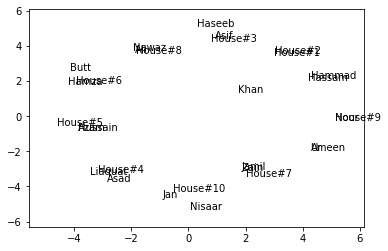

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()